# 개요.
- OpenCV를 알고 이미지연산, 이미지변형 등을 공부합니다.
- OpenCV를 이용하여 객체탐지 모델을 응용 공부합니다.

# Colab에서 사진업로드

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


# OpenCV의 기본적인 함수
- cv2.imread(file_name, flag): 이미지를 읽어 Numpy 객체로 만드는 함수
  - file_name : 읽고자 하는 이미지 파일
  - flag : 이미지를 읽는 방법 설정
    - IMREAD_COLOR : 이미지를 Color로 읽고, 투명한 부분은 무시
    - IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽기
    - IMREAD_UNCHAGED : 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)
  **반환 값* : Numpy 객체 (행, 열, 색상: 기본BGR)
- cv2.imshow(title, image): 특정한 이미지를 화면에 출력하는 함수
- cv2.cvtColor(image, flag): 이미지를 색상 형태를 변경하는 함수

# CoLab에서의 이미지 출력
- CoLab은 Jupyter Notebook을 기반으로 동작하므로 Matplotlib를 이용하여 이미지를 출력합니다.
- OpenCV는 BGR을 기준으로 하며, Matplotlib는 RGB를 기준으로 합니다.

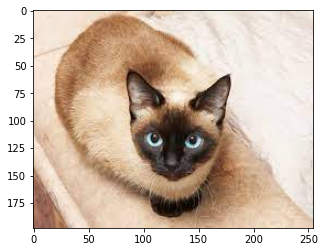

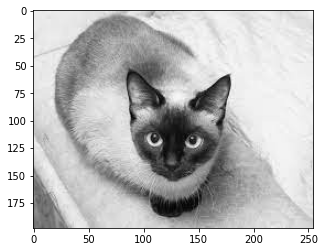

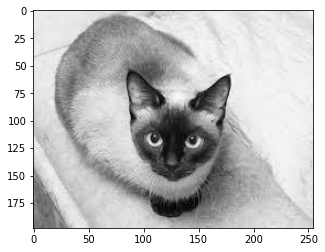

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_basic = cv2.imread('cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

# 회색출력법1 : cvtClolor를 이용하는 방법
img_gray = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

# 회색출력법2 : GRAYSCALE를 이용하는 방법
img_gray1 = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img_gray1, cv2.COLOR_BGR2RGB))
plt.show()

# OPEN CV 이미지 연산
OpenCV를 활용한 이미지 크기 및 픽셀 정보 확인

In [ ]:
image = cv2.imread('cat.jpg')

# 픽셀 수 및 이미지 크기 확인
# (가로, 세로, 색)
print("image.shape : ", image.shape)
# 가로 X 세로 X 색
print("image.size : ", image.size)

# 이미지 Numpy 객체의 특정 픽셀을 가리킵니다.
px = image[100, 100]

# B, G, R 순서로 출력됩니다.
# (단, Gray Scale인 경우에는 B, G, R로 구분되지 않습니다.)
# (100, 100)의 BGR
print("image.px : ", px)

# R 값만 출력하기
print("imgage.px RedColor : ", px[2])

image.shape :  (198, 255, 3)
image.size :  151470
image.px :  [139 172 211]
imgage.px RedColor :  211


- 반복문과 슬라이싱을 이용해 픽셀 변경 가능
- 슬라이싱을 이용했을 경우 시간단축에 도움됨.

In [ ]:
import time 

# 반복문을 이용해 픽셀값에 흰색입히기
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
      image[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

# 슬라이싱을 이용해 픽셀값에 검은색입히기
# start_time = time.time()
# image[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: ignored

- OpenCV를 활용한 ROI(Region of Interest: 관심 있는 영역) 추출

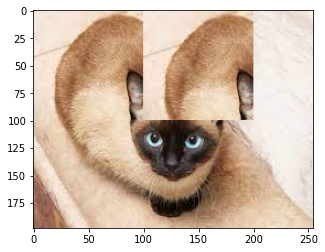

In [ ]:
image = cv2.imread('cat.jpg')

# Numpy Slicing: ROI 처리 가능
# roi에 추출하고자하는 위치 선정
roi = image[0:100, 0:100]

# ROI 단위로 이미지 복사하기
# 보여주고자 하는 위치에 roi 대입
image[0:100, 100:200] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

- OpenCV를 활용한 픽셀별 색상 다루기

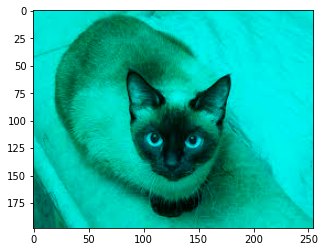

In [ ]:
image = cv2.imread('cat.jpg')
# 이미지의 모든 Red 값을 0으로 만듬.
image[:, :, 2] = 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# OPEN CV 이미지 변형
**cv2.resize(image, dsize, fx, fy, interpolation)**: 이미지의 크기를 조절합니다.

- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법

**보간법은 알려진 값을 가진 두 점 사이 어느 지점의 값이 얼마일지를 추정하는 기법.**

**사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미합니다.**

> 1) INTER_CUBIC : 사이즈를 크게 할 때 주로 사용합니다.
>
> 2) INTER_AREA : 사이즈를 작게 할 때 주로 사용합니다.

> 1) **INTER_NEAREST** : 최근접 보간법
>
> 2) **INTER_LINEAR** : 선형 보간법(used by default)
>
> 3) **INTER_AREA** : resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
>
> 4) **INTER_CUBIC** : a bicubic interpolation over 4×4 pixel neighborhood
>
> 5) **INTER_LANCZOS4** : a Lanczos interpolation over 8×8 pixel neighborhood

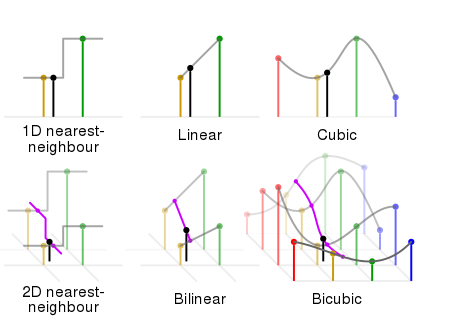

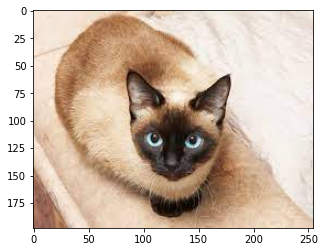

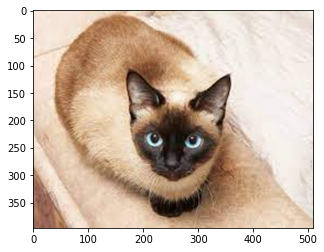

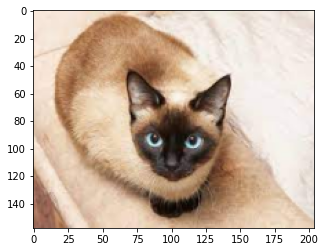

In [ ]:
# 고양이 사진
image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# 비율 2배 
expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

# 비율 0.8배
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

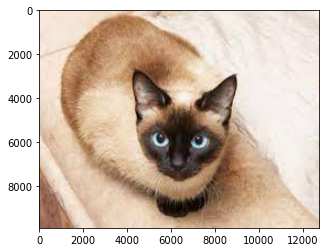

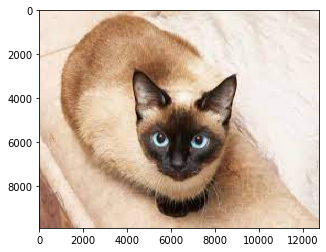

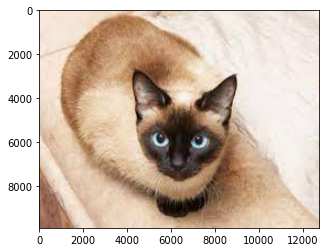

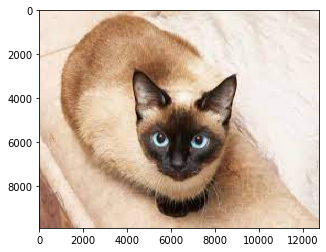

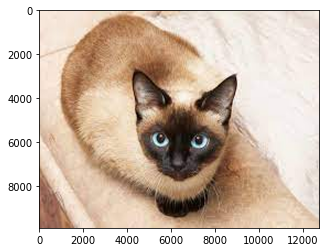

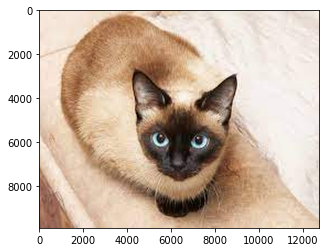

In [ ]:
# # 50배로 늘렸을 때 보간법 적용

# expand = cv2.resize(image, None, fx=50.0, fy=50.0)
# plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
# plt.show()
# img_nearest = cv2.resize(image, None, fx=50.0, fy=50.0, interpolation=cv2.INTER_NEAREST)
# plt.imshow(cv2.cvtColor(img_nearest, cv2.COLOR_BGR2RGB))
# plt.show()
# img_linear = cv2.resize(image, None, fx=50.0, fy=50.0, interpolation=cv2.INTER_LINEAR)
# plt.imshow(cv2.cvtColor(img_linear, cv2.COLOR_BGR2RGB))
# plt.show()
# img_area = cv2.resize(image, None, fx=50.0, fy=50.0, interpolation=cv2.INTER_AREA)
# plt.imshow(cv2.cvtColor(img_area, cv2.COLOR_BGR2RGB))
# plt.show()
# img_cubic = cv2.resize(image, None, fx=50.0, fy=50.0, interpolation=cv2.INTER_CUBIC)
# plt.imshow(cv2.cvtColor(img_cubic, cv2.COLOR_BGR2RGB))
# plt.show()
# img_lanczos4 = cv2.resize(image, None, fx=50.0, fy=50.0, interpolation=cv2.INTER_LANCZOS4)
# plt.imshow(cv2.cvtColor(img_lanczos4, cv2.COLOR_BGR2RGB))
# plt.show()

cv2.warpAffine(image, M, dsize): 이미지의 위치를 변경합니다.

- M: 변환 행렬
- dsize: Manual Size

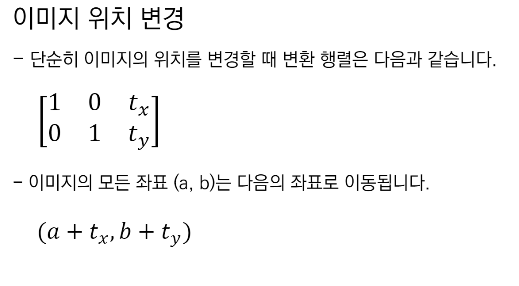

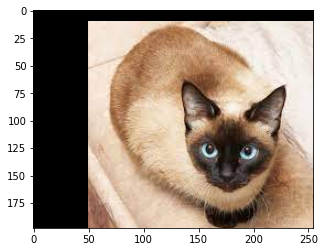

In [ ]:
# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]
# M 값을 통해 50, 10 만큼 이동
# dsize : Manual Size에 (width, height) 넣어줌.
M = np.float32([[1, 0, 50], [0, 1, 10]])
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

cv2.getRotationMatrix2D(center, angle, scale): 이미지 회전을 위한 변환 행렬을 생성합니다.

- center: 회전 중심
- angle: 회전 각도
- scale: Scale Factor

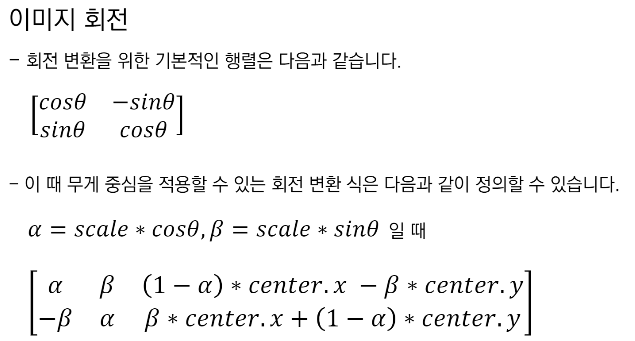

[[-1.10218212e-16 -6.00000000e-01  1.86900000e+02]
 [ 6.00000000e-01 -1.10218212e-16  2.25000000e+01]]


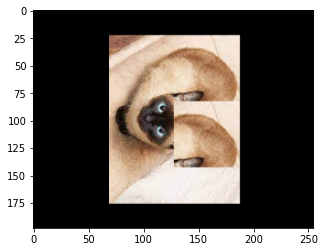

In [ ]:
height, width = image.shape[:2]
# center : 회전중심 값 = (width / 5, height / 2)
# angle : 회전각도 = 90
# scale : Scale Factor = 출력크기
M = cv2.getRotationMatrix2D((width / 2, height / 2), 270, 0.6)
print(M)
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# OPEN CV 이미지 합치기

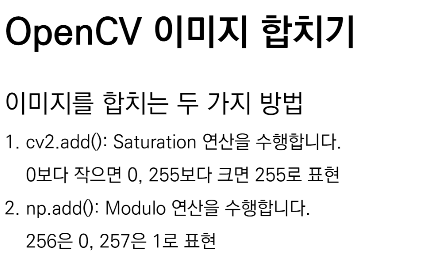

In [ ]:
uploaded = files.upload()

Saving cat_06.jpg to cat_06.jpg


In [ ]:
uploaded = files.upload()

Saving cat_ragdoll_02.jpg to cat_ragdoll_02.jpg


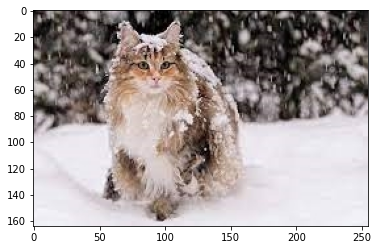

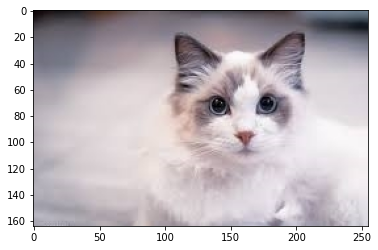

In [ ]:
image_1 = cv2.imread('cat_06.jpg', cv2.IMREAD_COLOR)
image_2 = cv2.imread('cat_ragdoll_02.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()

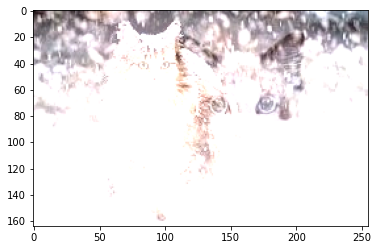

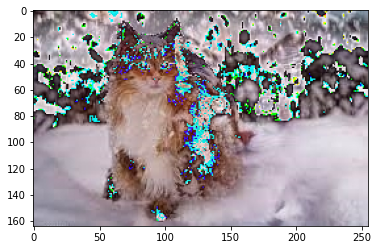

In [ ]:
# cv2를 이용해 합한 사진
# 값이 255이 초과하면 255가 되므로 저첸적으로 흰색에 쏠린다.
result = cv2.add(image_1, image_2) 
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Numpy를 이용해 합한 사진 
# 값이 255값을 초과한 부분은 어색한 색상이 나온다.
result = image_1 + image_2
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# 두 결과 좋지 않다.

# 이미지 Blending

# OPEN CV 임계점 처리하기
=> CNN에서 이미지 훈련할때 사용.

- cv2.threshold(image, thresh, max_value, type): 임계값을 기준으로 흑/백으로 분류하는 함수

  - image: 처리할 Gray Scale 이미지
  - thresh: 임계 값 (전체 픽셀에 적용)
  - max_value: 임계 값을 넘었을 때 적용할 값
  - type: 임계점을 처리하는 방식
> 1) THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0
>
> 2) THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0
> 
> 3) THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로
> 
> 4) THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0
> 
> 5) THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

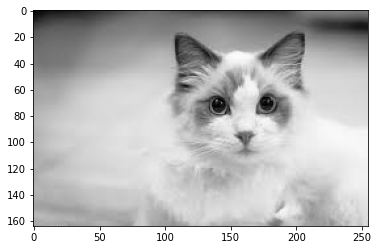

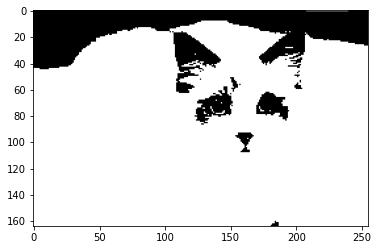

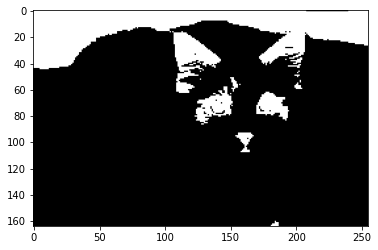

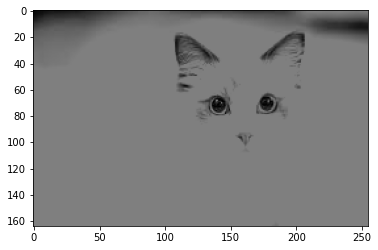

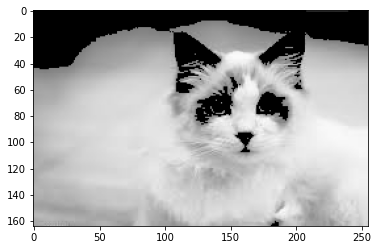

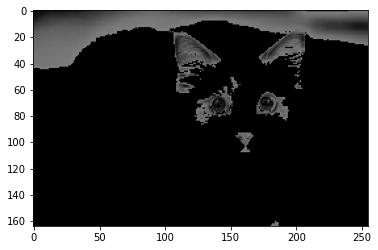

In [ ]:
image = cv2.imread('cat_ragdoll_02.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

> **cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)**: 적응 임계점 처리 함수
> 
> 하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋습니다.

  - max_value: 임계 값을 넘었을 때 적용할 값

  - adaptive_method: 임계 값을 결정하는 계산 방법


> 1) ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정
> 
> 2) ADAPTIVE_THRESH_GAUSSIAN_C

- type: 임계점을 처리하는 방식

- block_size: 임계 값을 적용할 영역의 크기

- C: 평균이나 가중 평균에서 차감할 값

> Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않습니다.

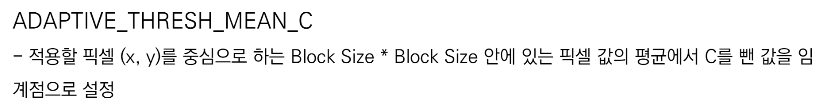

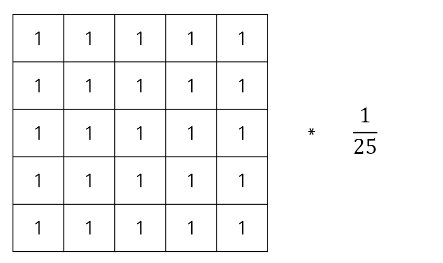

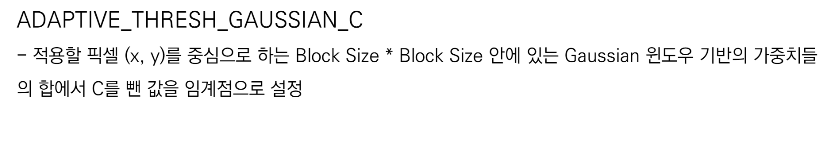

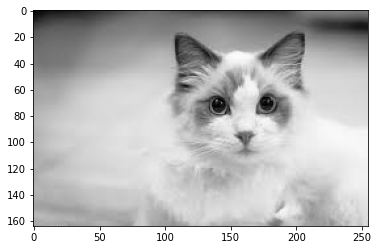

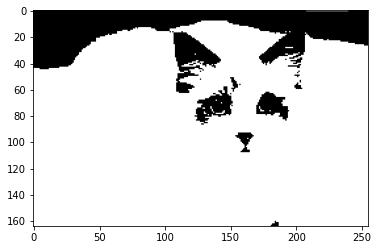

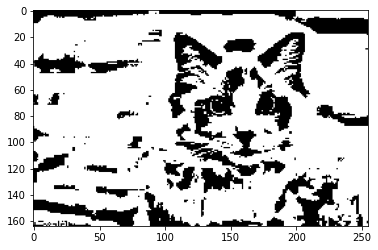

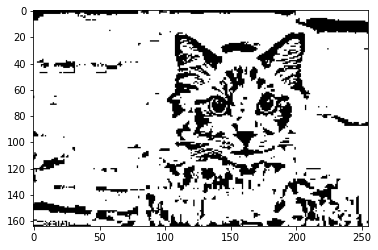

In [ ]:
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

# 흑백사진
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

# THRESH_BINARY 사진
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

# ADAPTIVE_THRESH_MEAN_C 사진
plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

# ADAPTIVE_THRESH_GAUSSIAN_C
plt.imshow(cv2.cvtColor(thres3, cv2.COLOR_GRAY2RGB))
plt.show()

# Reference

- 나동빈님의 gibhub 
 : https://github.com/ndb796/Python-OpenCV-Basic
- k4keye OpenCV 보간법 Naver Blog
 : https://m.blog.naver.com/vps32/221762092250
- 나동빈님의 Youtube OpenCV 이미지 연산 
 : https://www.youtube.com/watch?v=KkQC3q3mTgo
